<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Models_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E1 BANK CHURN**

##### About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

##### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Churn_Modelling.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom
!pip install BorutaShap

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
from IPython.display import clear_output
from prettytable import PrettyTable

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.integration import LightGBMPruningCallback, XGBoostPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 35.51483702659607 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


In [4]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=True):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42,tensorflow_init=True,pytorch_init=False)

### **1.1 Utility Functions**

#### Graph Functions:

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

#### Data Analysis Functions

### **1.2 Connect Drives**

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


## 2.0 Create Datasets

In [9]:
train = pd.read_csv('new_train_small.csv',index_col=0)
#train = pd.read_csv('new_train.csv',index_col=0)
#old_train = pd.read_csv("Churn_Modelling.csv")
test = pd.read_csv("new_test_small.csv",index_col=0)
#test = pd.read_csv("new_test.csv",index_col=0)
duplicate_results_test_df = pd.read_csv("known_test_targets.csv",index_col=0)
sample_submission = pd.read_csv('sample_submission.csv',index_col=0)

# Drop column id
#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)
#old_train.dropna(inplace=True,axis=0)
#old_train.rename({"RowNumber":"id"},axis=1,inplace=True)
#old_train.set_index("id", inplace=True)

In [10]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
#print("OLD-TRAIN DATA: {}".format(old_train.shape))
#display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (165034, 77)


,act_nop_count,CreditScore_pca_comb_count_label,0-100_Balance_RangeBalance_Range_OHE,Germany_Male_Geo_GenderGeo_Gender_OHE,1.862856099342586pow2_Age_cat_OHE,EstimatedSalary_Range_enc,log_Age_cat,NumOfProducts_cat_count_label,Age_cat,Surname_tfidf_1,...,NumOfProducts_cat_count,1_Female_bs_genderbs_gender_OHE,Balance_Salary_Range_enc,Surname_tfidf_3,Geography_count,Geography_count/NumOfProducts_cat_count_label,Balance_pca_comb,act_age_enc,Age-NumOfProducts_cat_count,Exited
0,-0.101357,0.397885,-0.309433,-0.35226,-0.149078,-0.130872,-0.510310,-0.945227,-0.510312,-0.122063,...,0.425803,-0.571571,-0.815040,-0.142446,0.86685,1.397681,0.910394,-0.364637,-0.554434,0.0
1,0.823512,-0.847092,-0.309433,-0.35226,-0.149078,-1.974514,-0.510310,-0.945227,-0.510312,-0.122044,...,0.425803,-0.571571,-0.921566,-0.142508,0.86685,1.397681,0.910394,-0.843953,-0.554434,0.0
2,-0.101357,-1.118724,-0.309433,-0.35226,-0.149078,1.367406,-0.510291,-0.945227,-0.510289,-0.153394,...,0.425803,-0.571571,-0.932480,-0.187588,0.86685,1.397681,0.910394,-0.010303,-0.554427,0.0


TEST DATA: (110023, 76)


,act_nop_count,CreditScore_pca_comb_count_label,0-100_Balance_RangeBalance_Range_OHE,Germany_Male_Geo_GenderGeo_Gender_OHE,1.862856099342586pow2_Age_cat_OHE,EstimatedSalary_Range_enc,log_Age_cat,NumOfProducts_cat_count_label,Age_cat,Surname_tfidf_1,...,bs_gender_enc,NumOfProducts_cat_count,1_Female_bs_genderbs_gender_OHE,Balance_Salary_Range_enc,Surname_tfidf_3,Geography_count,Geography_count/NumOfProducts_cat_count_label,Balance_pca_comb,act_age_enc,Age-NumOfProducts_cat_count
0,0.823512,-0.405691,-0.309433,-0.35226,-0.149078,0.195666,1.959626,-0.945227,1.959626,-0.12258,...,0.234525,0.425803,1.749564,-0.711784,-0.145081,0.86685,1.397681,0.910394,-0.785562,0.241988
1,0.226791,-1.073452,-0.309433,-0.35226,-0.149078,-1.093178,-0.510276,0.909379,-0.510269,-0.12206,...,0.317463,-0.175903,1.749564,-0.765409,-0.142503,0.86685,-0.887967,0.910394,2.393417,-0.003469
2,-0.101357,-0.699959,-0.309433,-0.35226,-0.149078,0.211634,-0.510307,-0.945227,-0.510309,-0.12206,...,0.146496,0.425803,1.749564,-1.064111,-0.142503,0.86685,1.397681,0.910394,-0.500302,-0.554433


In [11]:
#total = pd.concat([train,test],axis=0,ignore_index=True)
#train = total.iloc[:len(train),:]
#test = total.iloc[len(train):,:]

In [12]:
summary(train).style.background_gradient(cmap='Reds')

data shape: (165034, 77)


,data type,#missing,%missing,#unique,min,max,median
act_nop_count,float64,0,0.000000,5,-5.916388,0.823512,0.226791
CreditScore_pca_comb_count_label,float64,0,0.000000,459,-1.130042,4.053589,-0.258558
0-100_Balance_RangeBalance_Range_OHE,float64,0,0.000000,2,-0.309433,3.231719,-0.309433
Germany_Male_Geo_GenderGeo_Gender_OHE,float64,0,0.000000,2,-0.352260,2.838810,-0.352260
1.862856099342586pow2_Age_cat_OHE,float64,0,0.000000,2,-0.149078,6.707913,-0.149078
EstimatedSalary_Range_enc,float64,0,0.000000,165034,-3.732784,4.498130,-0.059559
log_Age_cat,float64,0,0.000000,21,-0.510327,1.959626,-0.510296
NumOfProducts_cat_count_label,float64,0,0.000000,3,-0.945227,2.763985,-0.945227
Age_cat,float64,0,0.000000,21,-0.510332,1.959626,-0.510296
Surname_tfidf_1,float64,0,0.000000,1007,-0.193693,8.134518,-0.122060


## **3.0 MODELS**

### **3.1.0 LGBMClassifier**

#### 3.1.1 Opt Baseline:

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 113 entries, act_nop_count to Exited
dtypes: float64(113)
memory usage: 143.5 MB


**Encoded Dataset**

In [52]:
X = train.drop(columns=['Exited'])
y = train['Exited']

# Setting the cv strategy
kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1978)

def objective(trial):

    validation=0.2
    # Setting the search space
    colsample_bytree = trial.suggest_float('colsample_bytree',0.10, 0.70)
    subsample = trial.suggest_float('subsample',0.10,0.90)
    max_depth = trial.suggest_int("max_depth", 3, 12, step=1)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.20, step=0.01)
    num_leaves = trial.suggest_int("num_leaves", 5, 80, step=5)
    reg_alpha = trial.suggest_loguniform("reg_alpha",0.01,10.0)
    reg_lambda = trial.suggest_loguniform("reg_lambda",0.01,10.0)

    score_list=[]

    # Initiaize the model
    clf = LGBMClassifier(random_state = 32,objective='binary',boosting_type='gbdt',metric="auc",
                  learning_rate=learning_rate,verbosity=-1, eval_metric="auc",class_weight ="balanced",
                  colsample_bytree=colsample_bytree,
                  subsample=subsample,n_estimators=5000,
                  max_depth=max_depth,
                  num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda)

    for k, (train_index, test_index) in enumerate(kf.split(X, y)):

      train_examples = len(train_index)
      train_examples = int(train_examples * (1 - validation))
      train_index, val_index = train_index[:train_examples], train_index[train_examples:]

      train_x, valid_x = X.iloc[train_index,:], X.iloc[val_index,:]
      train_y, valid_y = y[train_index],  y[val_index]

      fit_params={"eval_set":(valid_x,valid_y),"callbacks":[early_stopping(stopping_rounds=81), LightGBMPruningCallback(trial, metric="auc",report_interval=5)]}
      clf.fit(train_x,train_y,**fit_params)
      y_prob = clf.predict_proba(valid_x)

      score_tep = roc_auc_score(valid_y,y_prob[:,1])
      score_list.append(score_tep)

    score = np.mean(score_list)

    return score

In [53]:
# Create study object
study = optuna.create_study(direction="maximize", study_name="baseline_opt_all")

# Run optimization process
study.optimize(objective, n_trials=200, show_progress_bar=True)

[I 2024-01-15 14:26:45,617] A new study created in memory with name: baseline_opt_all


  0%|          | 0/200 [00:00<?, ?it/s]

Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.888673
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[167]	valid_0's auc: 0.891451
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.888131
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.88825
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.891156
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.88846
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.892546
Training until validation scores don't improve for 81 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.8875

In [55]:
trial = study.best_trial
print('AUC: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

AUC: 0.8905908337261556
Best hyperparameters: {'colsample_bytree': 0.235938885155153, 'subsample': 0.7681296541976882, 'max_depth': 5, 'learning_rate': 0.09, 'num_leaves': 5, 'reg_alpha': 1.4135506692514277, 'reg_lambda': 0.3682060308550174}


In [62]:
print('''
Encoded Dataset Parameters:
1 trial: rn-42
AUC: 0.8942078685438148
Best hyperparameters: {'colsample_bytree': 0.1039183140926741, 'subsample': 0.10462616387936806, 'max_depth': 8, 'learning_rate': 0.04, 'num_leaves': 40, 'reg_alpha': 0.022959176670594852, 'reg_lambda': 0.017470814982109045}

2 trial: rn-17
AUC: 0.8962784221324347
Best hyperparameters: {'colsample_bytree': 0.2388734648350207, 'subsample': 0.41876729025342696, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'num_leaves': 70, 'reg_alpha': 0.475042314779538, 'reg_lambda': 0.3384206914603566}

3 trial: rn-0
AUC: 0.8907464886845062
Best hyperparameters: {'colsample_bytree': 0.10310986709666636, 'subsample': 0.6447313586007323, 'max_depth': 10, 'learning_rate': 0.08, 'num_leaves': 45, 'reg_alpha': 0.22798421715130796, 'reg_lambda': 0.19019183133884662}

4 trial: rn-1978
AUC: 0.8908004008650379
Best hyperparameters: {'colsample_bytree': 0.18154640187716334, 'subsample': 0.7126480792001428, 'max_depth': 7, 'learning_rate': 0.08, 'num_leaves': 25, 'reg_alpha': 0.5971553859092549, 'reg_lambda': 0.5513307568734641}

5 trial: rn-1978 Max-Data
AUC: 0.8905908337261556
Best hyperparameters: {'colsample_bytree': 0.235938885155153, 'subsample': 0.7681296541976882, 'max_depth': 5, 'learning_rate': 0.09, 'num_leaves': 5, 'reg_alpha': 1.4135506692514277, 'reg_lambda': 0.3682060308550174}
''')

best_param = {'colsample_bytree': 0.18154640187716334,
              'subsample': 0.7126480792001428,
              'max_depth': 7,
              'learning_rate': 0.08,
              'num_leaves': 25,
              'reg_alpha': 0.5971553859092549,
              'reg_lambda': 0.5513307568734641}

best_param = {'colsample_bytree': 0.1039183140926741,
              'subsample': 0.10462616387936806,
              'max_depth': 8,
              'learning_rate': 0.04,
              'num_leaves': 40,
              'reg_alpha': 0.022959176670594852,
              'reg_lambda': 0.017470814982109045}

best_param = {'colsample_bytree': 0.235938885155153,
              'subsample': 0.7681296541976882,
              'max_depth': 5,
              'learning_rate': 0.09,
              'num_leaves': 5,
              'reg_alpha': 1.4135506692514277,
              'reg_lambda': 0.3682060308550174}


Encoded Dataset Parameters:
1 trial: rn-42
AUC: 0.8942078685438148
Best hyperparameters: {'colsample_bytree': 0.1039183140926741, 'subsample': 0.10462616387936806, 'max_depth': 8, 'learning_rate': 0.04, 'num_leaves': 40, 'reg_alpha': 0.022959176670594852, 'reg_lambda': 0.017470814982109045}

2 trial: rn-17
AUC: 0.8962784221324347
Best hyperparameters: {'colsample_bytree': 0.2388734648350207, 'subsample': 0.41876729025342696, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'num_leaves': 70, 'reg_alpha': 0.475042314779538, 'reg_lambda': 0.3384206914603566}

3 trial: rn-0
AUC: 0.8907464886845062
Best hyperparameters: {'colsample_bytree': 0.10310986709666636, 'subsample': 0.6447313586007323, 'max_depth': 10, 'learning_rate': 0.08, 'num_leaves': 45, 'reg_alpha': 0.22798421715130796, 'reg_lambda': 0.19019183133884662}

4 trial: rn-1978
AUC: 0.8908004008650379
Best hyperparameters: {'colsample_bytree': 0.18154640187716334, 'subsample': 0.7126480792001428, 'max_depth': 7, 'learning_rat

In [63]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

#### 3.1.2 Fit the Model

In [64]:
def run_experiment(train, test_data_file, best_params=best_param, experiment_name="model_rf", splits=5, n_repeats=5, rs=42, calibrate=True):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_results = pd.DataFrame(index=test_data_file.index, columns=list(range(splits*n_repeats)))

  test_results_df = pd.DataFrame(index=test_data_file.index, columns=["Exited"])

  all_logloss = []
  all_AUC_pr = []
  oof_results = np.empty(shape=(train.shape[0],splits*n_repeats))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train["Exited"])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=["Exited"]).copy()
    y = X_trn["Exited"].copy()

    val_X = X_val.drop(columns=["Exited"]).copy()
    val_y = X_val["Exited"].copy()

    test_X = test_data_file.copy()
    #################################################################### End of Dataset Preparation

    ##################################################################### Generate and Fit Model
    model = LGBMClassifier(random_state = rs,
                           objective='binary',
                           boosting_type='gbdt',
                           metric="auc",
                           verbosity=-1,
                           eval_metric="auc",
                           class_weight ="balanced",
                           **best_param)

    print("Start training the model...")
    model.fit(X,y)
    if calibrate:
      print("Model Calibration")
      cal_model = CalibratedClassifierCV(model, method="sigmoid", cv="prefit")
      cal_model.fit(val_X, val_y)
      model = cal_model
    print("Model training finished")

    val_probs = model.predict_proba(val_X)
    test_prob = model.predict_proba(test_X)
    oof_results[valid_index,i] = val_probs[:,1]
    auc_score = roc_auc_score(val_y, val_probs[:,1])

    y_hat_val = model.predict(val_X)

    plot_confusion_matrix(val_y, y_hat_val, labels=[0,1])

    print("\n",classification_report(y_true=val_y, y_pred=y_hat_val))

    test_results.iloc[:,i] = test_prob[:,1]

    ##################################################################### Save the Model
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/{experiment_name}/"
    folders_experiment_cv = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/{experiment_name}/cv_{i}/"

    list_directories = [folder_data,folders_experiment,folders_experiment_cv]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")

    os.chdir(folders_experiment_cv)
    dump(model, f'{experiment_name}.joblib')
    os.chdir(folder_data)

    print(f"Test AUC Score: {round(auc_score, 3)}%")
    all_AUC_pr.append(round(auc_score, 3))

  ##################################################################### Create Model Output
  test_results["Mean"] = test_results.mean(axis=1)

  test_results_df.loc[:,"Exited"] = test_results["Mean"].values

  print(f"All Valuation AUC: {all_AUC_pr}")

  return test_results_df, oof_results


Running CV 0

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


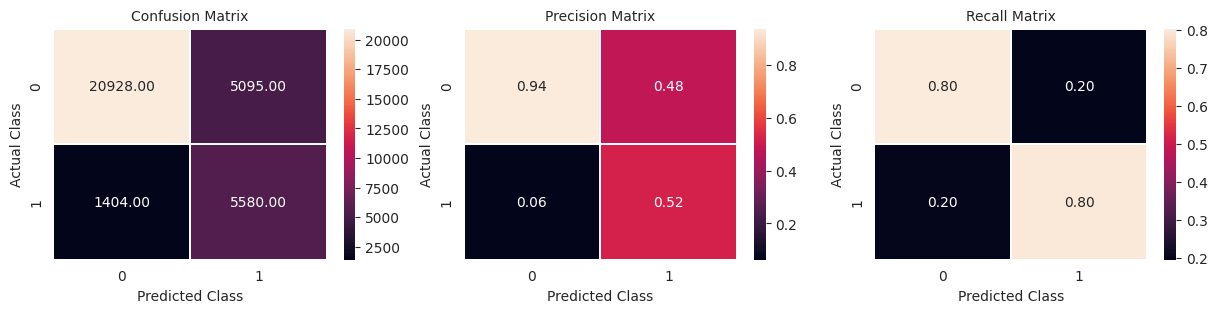


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_0/ already exists
Test AUC Score: 0.887%

Running CV 1

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


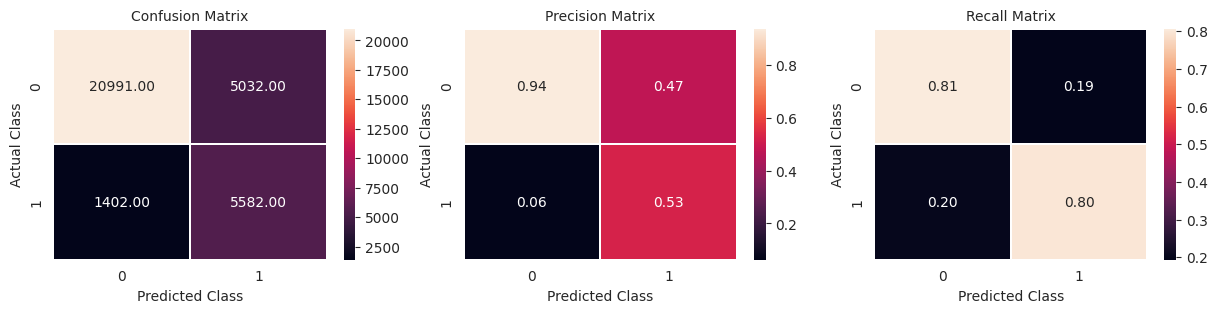


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_1/ already exists
Test AUC Score: 0.887%

Running CV 2

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


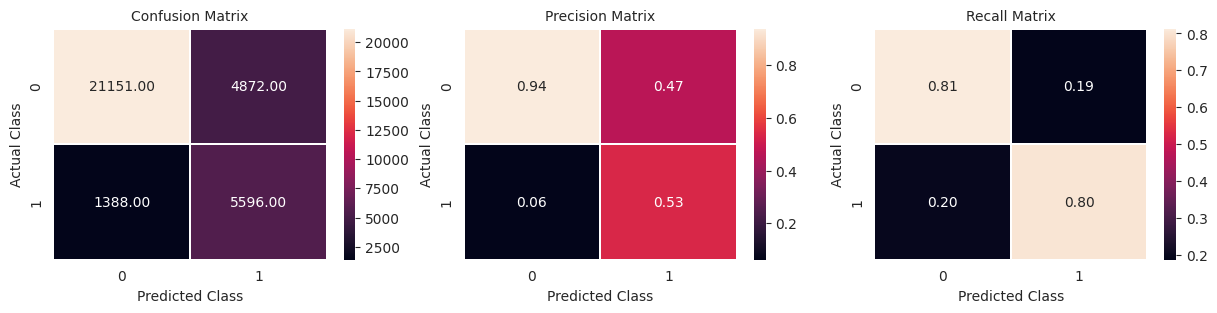


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.76     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_2/ already exists
Test AUC Score: 0.888%

Running CV 3

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


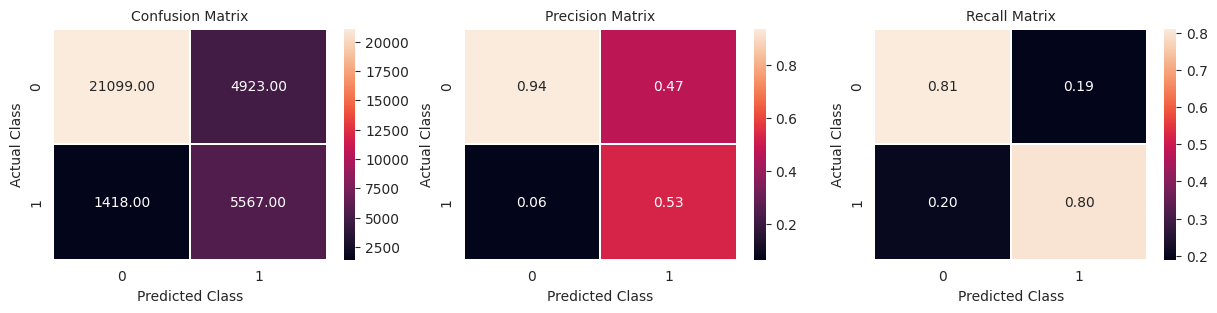


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 4

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


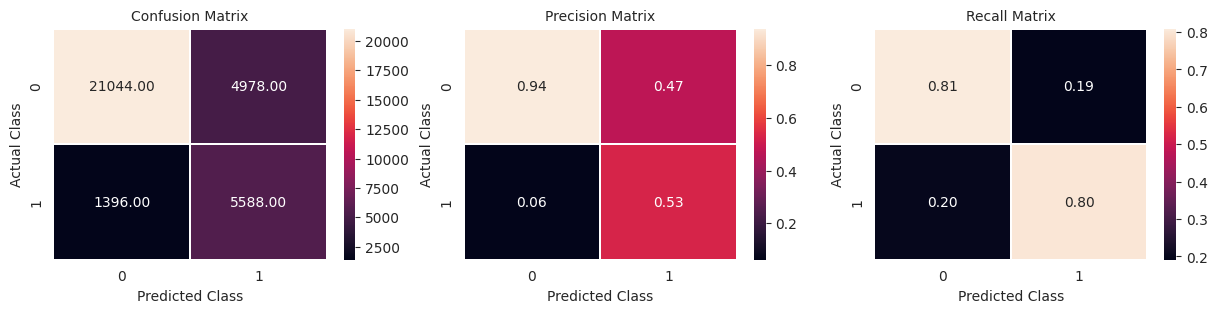


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.885%

Running CV 5

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


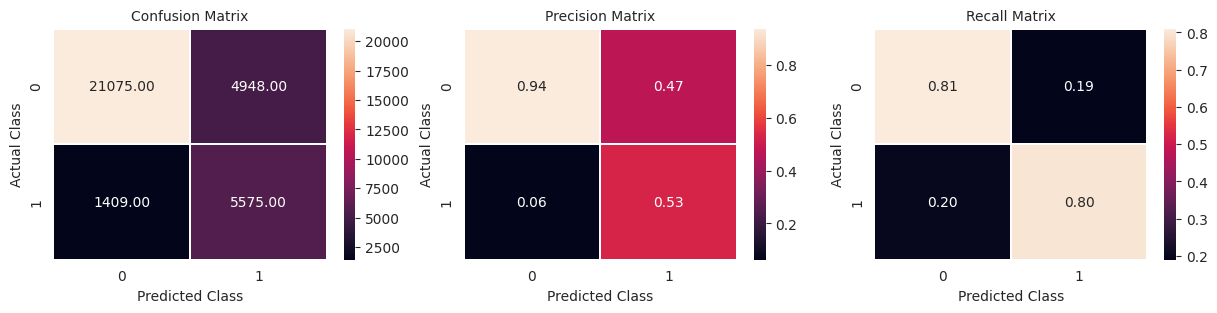


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 6

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


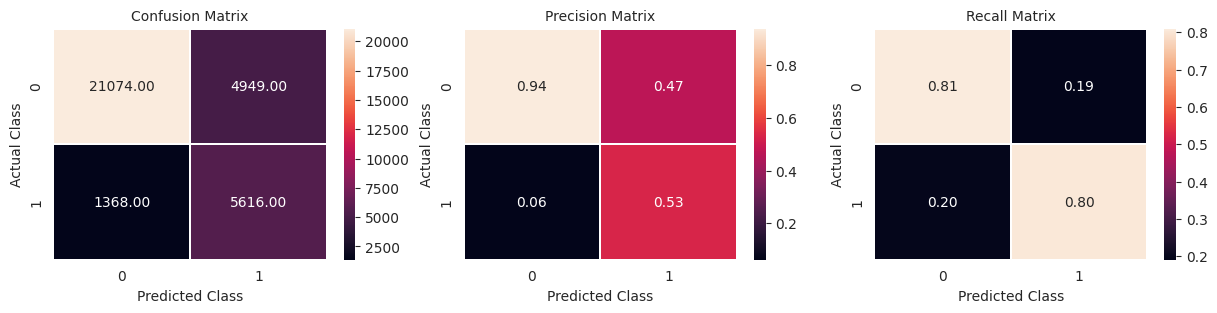


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.89%

Running CV 7

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


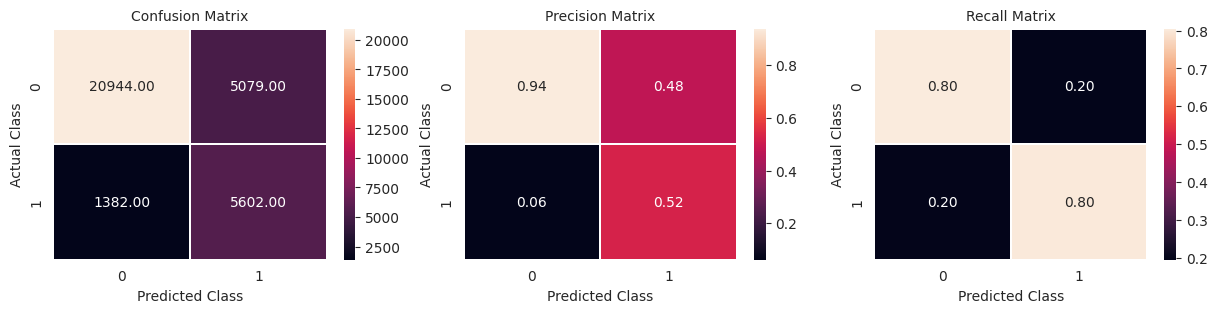


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 8

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


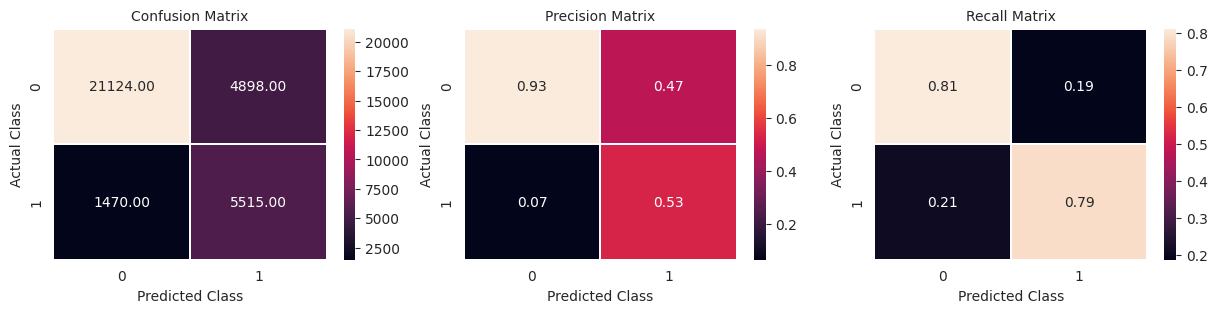


               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     26022
         1.0       0.53      0.79      0.63      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.885%

Running CV 9

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


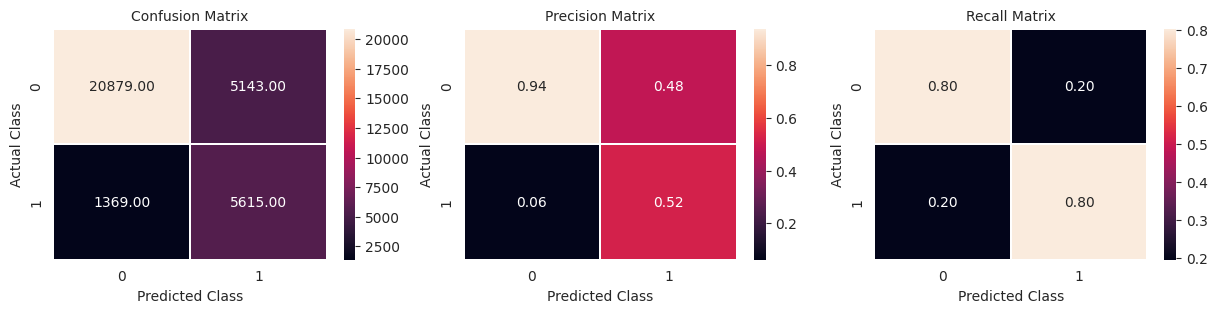


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26022
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.80      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 10

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


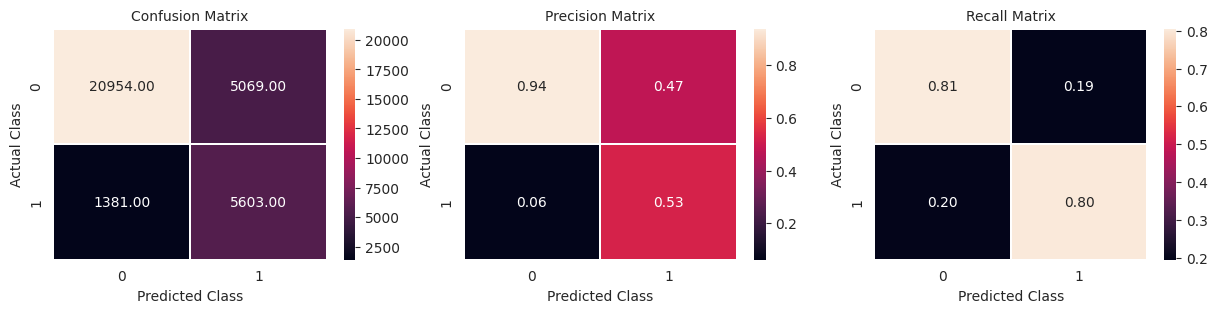


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%

Running CV 11

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


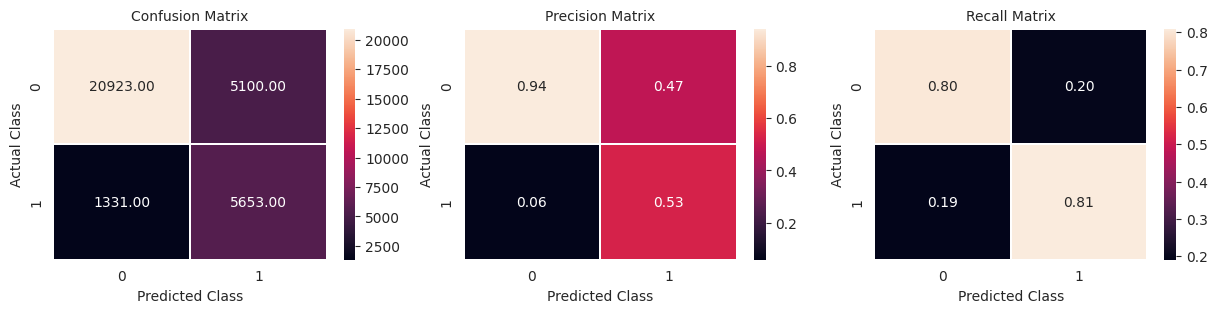


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.53      0.81      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.891%

Running CV 12

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


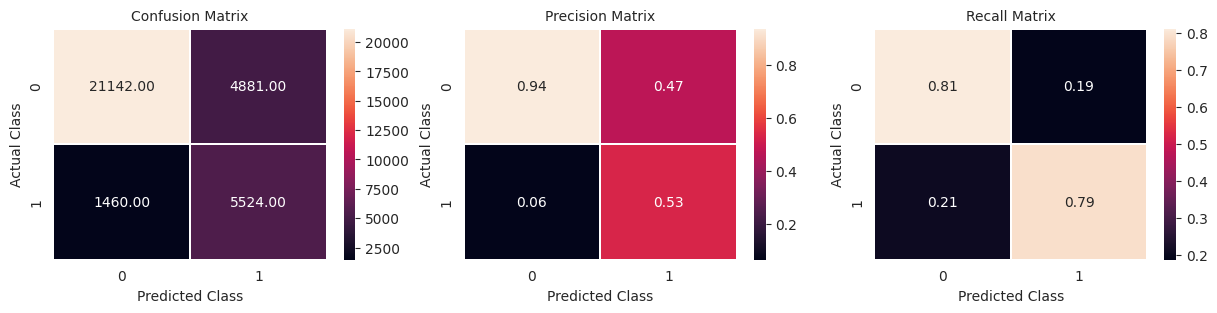


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.79      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%

Running CV 13

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


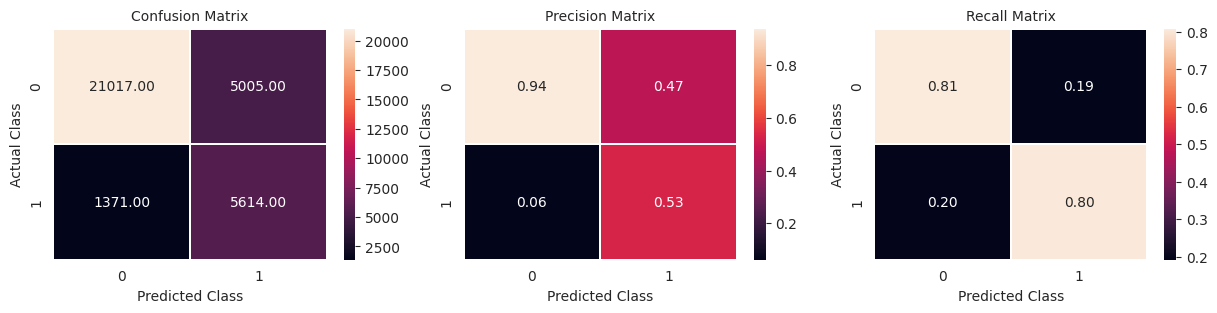


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 14

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


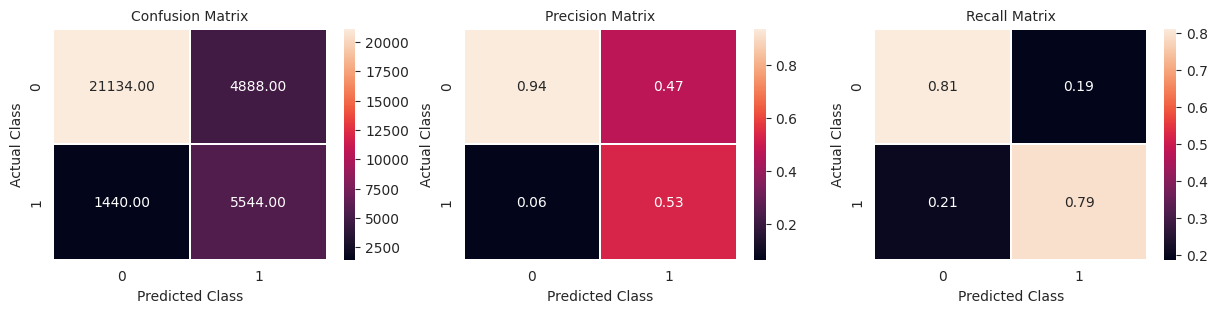


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.79      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 15

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


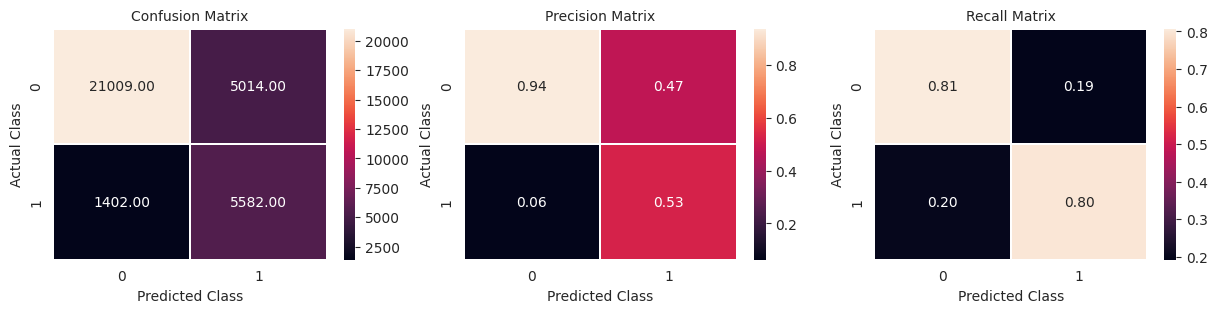


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 16

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


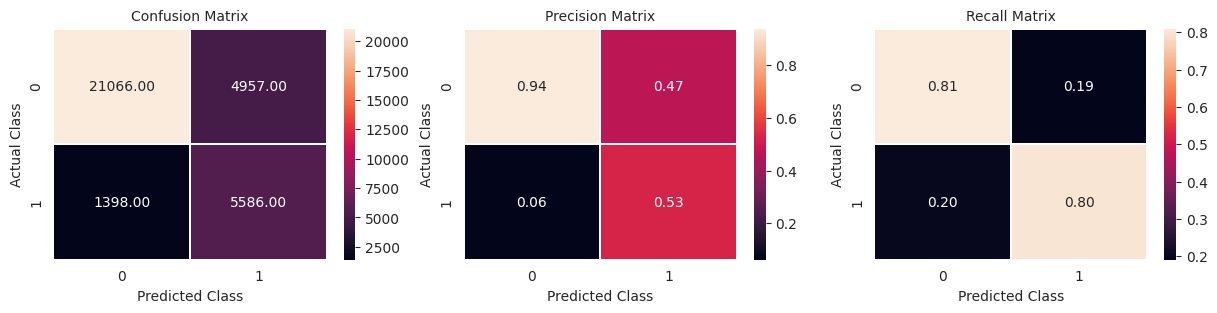


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 17

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


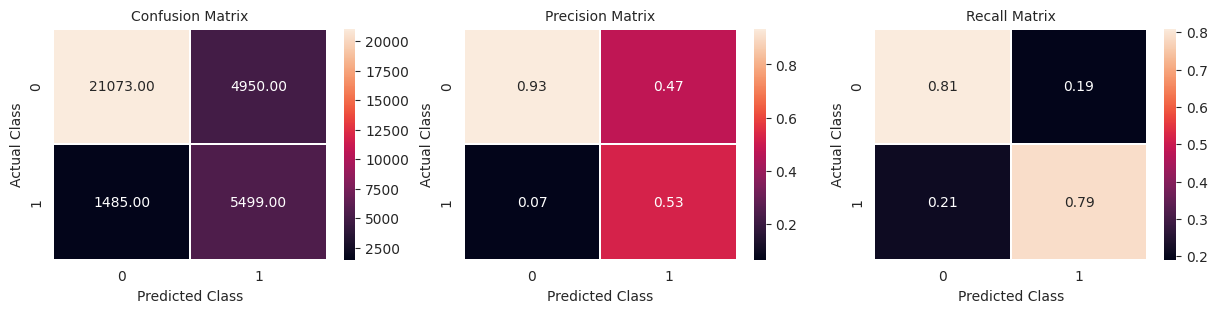


               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     26023
         1.0       0.53      0.79      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.883%

Running CV 18

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


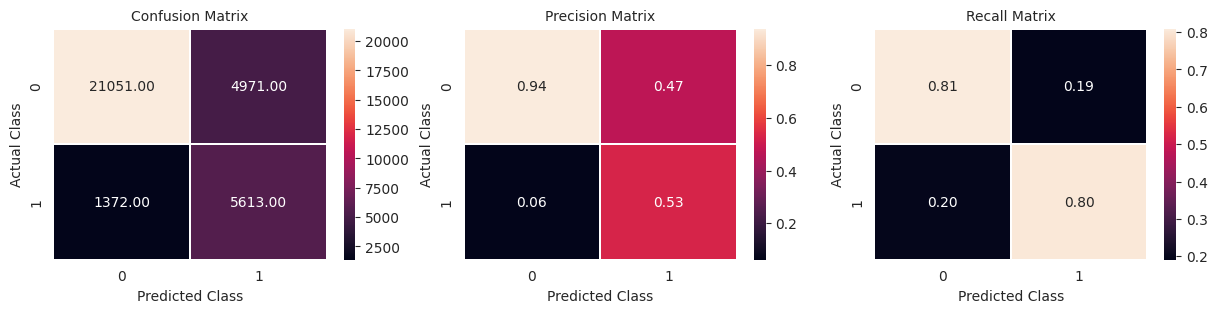


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.89%

Running CV 19

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


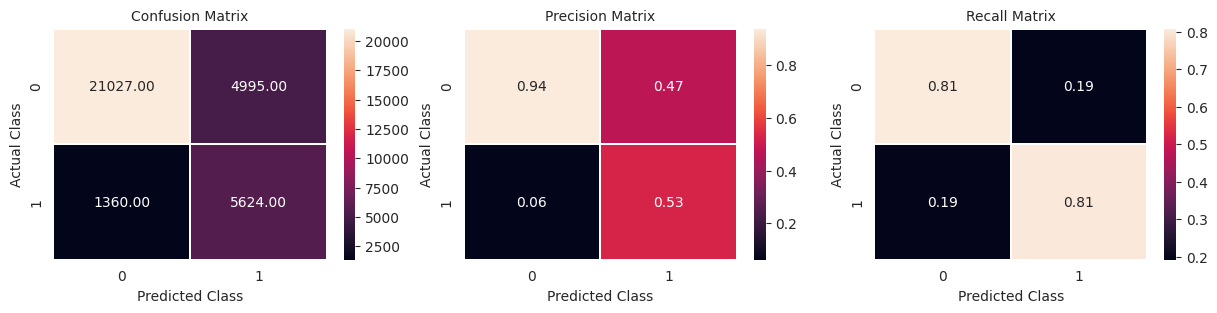


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.81      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.81      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 20

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


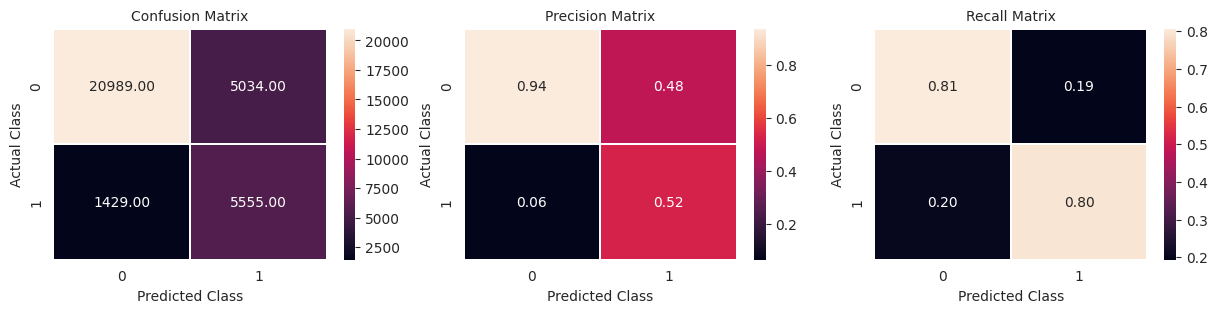


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 21

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


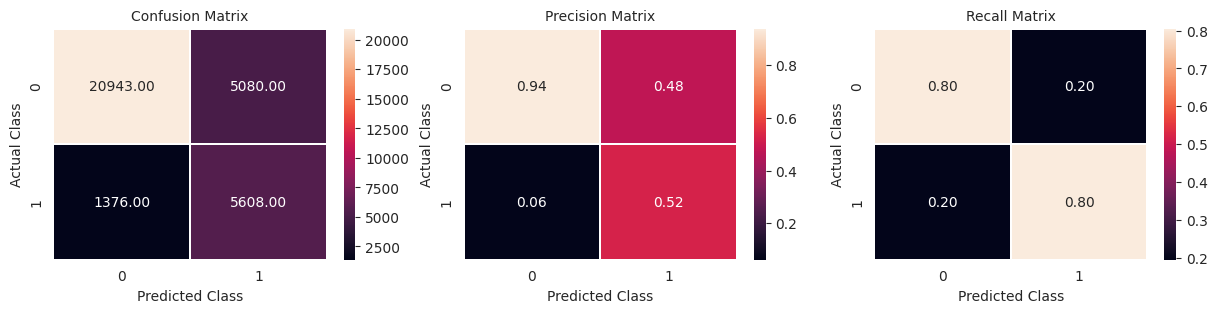


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 22

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


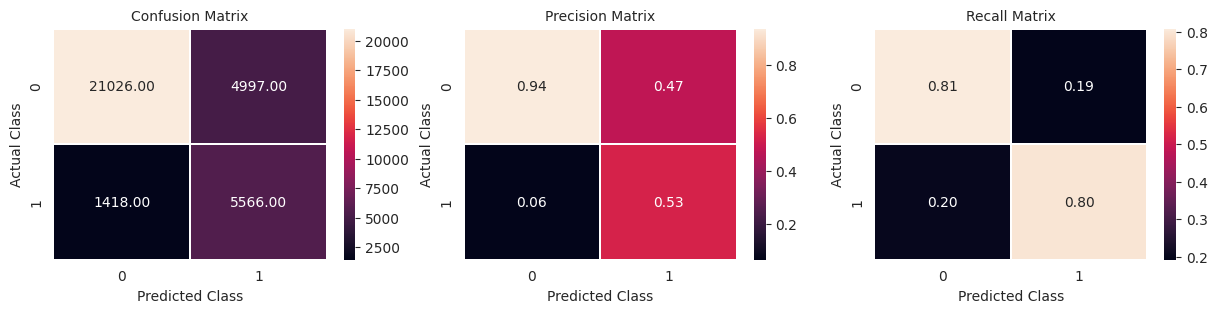


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 23

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


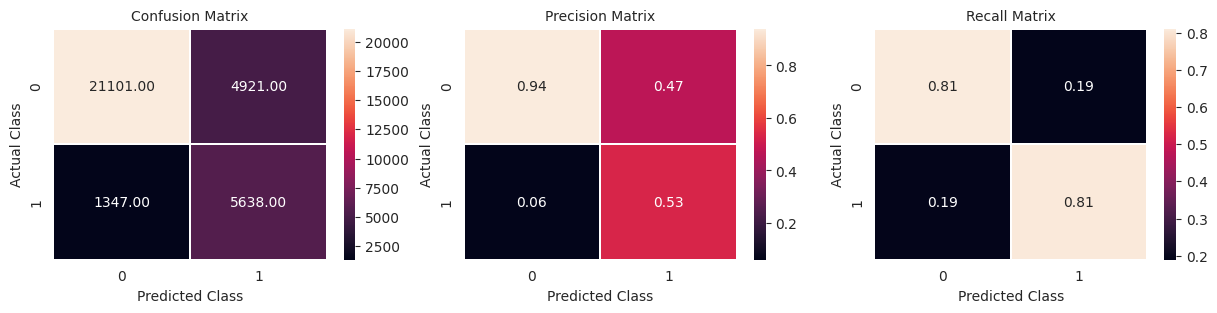


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.81      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.76     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 24

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


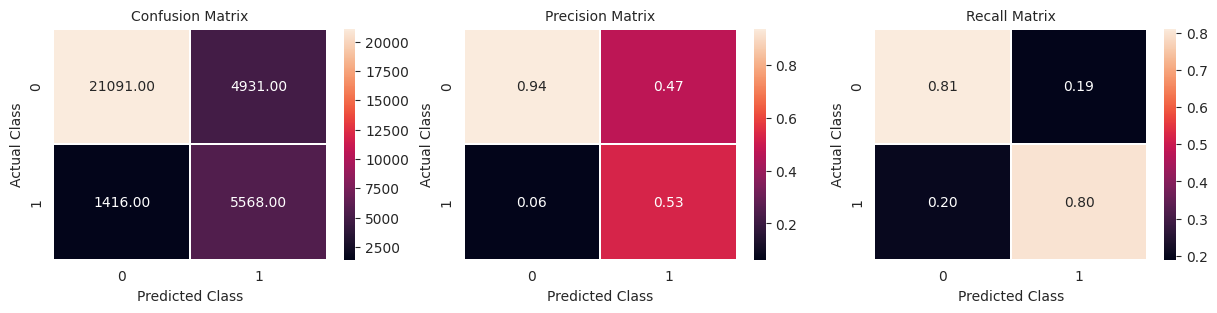


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%
All Valuation AUC: [0.887, 0.887, 0.888, 0.888, 0.885, 0.887, 0.89, 0.888, 0.885, 0.887, 0.886, 0.891, 0.886, 0.888, 0.887, 0.887, 0.889, 0.883, 0.89, 0.889, 0.887, 0.887, 0.887, 0.889, 0.886]


In [65]:
test_results_df, oof_results = run_experiment(train,
                                              test,
                                              best_params=best_param,
                                              experiment_name="model_LGBM_extended_all_ds_v2",
                                              splits=5,
                                              n_repeats=5,
                                              rs=42,
                                              calibrate=False)

In [68]:
np.mean([0.891, 0.892, 0.893, 0.893, 0.89, 0.892, 0.894, 0.893, 0.889, 0.891, 0.891, 0.896, 0.891, 0.892, 0.891, 0.891, 0.892, 0.887, 0.894, 0.894, 0.892, 0.891, 0.892, 0.894, 0.891])
np.mean([0.893, 0.894, 0.894, 0.895, 0.892, 0.893, 0.895, 0.895, 0.89, 0.893, 0.892, 0.897, 0.892, 0.893, 0.892, 0.892, 0.894, 0.889, 0.896, 0.895, 0.893, 0.892, 0.893, 0.895, 0.893])
np.mean([0.893, 0.894, 0.894, 0.895, 0.891, 0.893, 0.895, 0.895, 0.89, 0.892, 0.891, 0.897, 0.892, 0.894, 0.892, 0.892, 0.894, 0.889, 0.896, 0.895, 0.892, 0.891, 0.893, 0.895, 0.893])
np.mean([0.887, 0.887, 0.888, 0.888, 0.885, 0.887, 0.89, 0.888, 0.885, 0.887, 0.886, 0.891, 0.886, 0.888, 0.887, 0.887, 0.889, 0.883, 0.89, 0.889, 0.887, 0.887, 0.887, 0.889, 0.886])

0.88736

#### 3.1.3 Store Results

In [69]:
experiment_name="model_LGBM_v5_extended_all"

sub = pd.read_csv("sample_submission.csv", index_col=0)
sub.iloc[:,:] = test_results_df.values
sub.to_csv(f"Results/{experiment_name}.csv")
sub

,Exited
id,
165034,0.080981
165035,0.948366
165036,0.104202
165037,0.625639
165038,0.725914
...,...
275052,0.131074
275053,0.318224
275054,0.056549


In [70]:
sub.loc[duplicate_results_test_df.index,:] = duplicate_results_test_df.values
sub.loc[duplicate_results_test_df.index,:]

sub.to_csv(f"Results/{experiment_name}_with_replacement.csv")

sub.loc[duplicate_results_test_df.index,:]

,Exited
id,
165430,1.0
165722,0.0
165984,1.0
166638,0.0
167218,0.0
...,...
272929,1.0
273022,1.0
273075,1.0


### **3.2.0 XGBoostClassifier**

#### 3.1.1 Opt Baseline:

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 77 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   act_nop_count                                                165034 non-null  float64
 1   CreditScore_pca_comb_count_label                             165034 non-null  float64
 2   0-100_Balance_RangeBalance_Range_OHE                         165034 non-null  float64
 3   Germany_Male_Geo_GenderGeo_Gender_OHE                        165034 non-null  float64
 4   1.862856099342586pow2_Age_cat_OHE                            165034 non-null  float64
 5   EstimatedSalary_Range_enc                                    165034 non-null  float64
 6   log_Age_cat                                                  165034 non-null  float64
 7   NumOfProducts_cat_count_label                                1650

**Encoded Dataset**

In [39]:
X = train.drop(columns=['Exited'])
y = train['Exited']

# Setting the cv strategy
kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1978)

def objective(trial):

    validation=0.2
    # Setting the search space
    colsample_bytree = trial.suggest_float('colsample_bytree',0.10, 0.90)
    subsample = trial.suggest_float('subsample',0.10,0.95)
    max_depth = trial.suggest_int("max_depth", 3, 12, step=1)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.12, step=0.01)
    min_child_weight = trial.suggest_int("min_child_weight", 5, 60, step=5)
    reg_alpha = trial.suggest_loguniform("reg_alpha",0.01,10.0)
    reg_lambda = trial.suggest_loguniform("reg_lambda",0.01,10.0)

    score_list=[]


    clf = XGBClassifier(objective = 'binary:logistic',
                        eval_metric = "auc",
                        random_state = 42,
                        verbosity=0,
                        scale_pos_weight = 3,
                        use_best_model=True,
                        n_estimators = 4000,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        colsample_bytree=colsample_bytree,
                        subsample=subsample,
                        min_child_weight=min_child_weight,
                        reg_alpha=reg_alpha,
                        reg_lambda=reg_lambda)

    for k, (train_index, test_index) in enumerate(kf.split(X, y)):

      train_examples = len(train_index)
      train_examples = int(train_examples * (1 - validation))
      train_index, val_index = train_index[:train_examples], train_index[train_examples:]

      train_x, valid_x = X.iloc[train_index,:], X.iloc[val_index,:]
      train_y, valid_y = y[train_index],  y[val_index]

      pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-auc")
      early_stop = xgb.callback.EarlyStopping(rounds=101, save_best=True)

      clf.fit(train_x,train_y,eval_set=[(valid_x,valid_y)],
              callbacks=[early_stop,pruning_callback], verbose =False
              )
      y_prob = clf.predict_proba(valid_x)

      score_tep = roc_auc_score(valid_y,y_prob[:,1])
      score_list.append(score_tep)

    score = np.mean(score_list)

    return score

In [40]:
# Create study object
study = optuna.create_study(direction="maximize", study_name="baseline_opt_all", pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))

# Run optimization process
study.optimize(objective, n_trials=200, show_progress_bar=True)

[I 2024-01-15 16:45:19,072] A new study created in memory with name: baseline_opt_all


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2024-01-15 16:55:43,378] Trial 0 finished with value: 0.8877898984391448 and parameters: {'colsample_bytree': 0.41845452768024616, 'subsample': 0.9202343244780141, 'max_depth': 11, 'learning_rate': 0.02, 'min_child_weight': 5, 'reg_alpha': 0.31822438965809496, 'reg_lambda': 0.022867070025135813}. Best is trial 0 with value: 0.8877898984391448.
[I 2024-01-15 16:58:07,766] Trial 1 finished with value: 0.8888945713104217 and parameters: {'colsample_bytree': 0.8957847254933002, 'subsample': 0.5287838803291939, 'max_depth': 6, 'learning_rate': 0.08, 'min_child_weight': 25, 'reg_alpha': 0.02333321499240641, 'reg_lambda': 2.5294503491678286}. Best is trial 1 with value: 0.8888945713104217.
[I 2024-01-15 17:00:31,407] Trial 2 finished with value: 0.8877333364744701 and parameters: {'colsample_bytree': 0.20740647239062185, 'subsample': 0.27754287935401195, 'max_depth': 7, 'learning_rate': 0.06999999999999999, 'min_child_weight': 10, 'reg_alpha': 2.6618062034541574, 'reg_lambda': 0.0112559757

In [41]:
trial = study.best_trial
print('AUC: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

AUC: 0.8898101789064464
Best hyperparameters: {'colsample_bytree': 0.8654651145601225, 'subsample': 0.8130639476849305, 'max_depth': 5, 'learning_rate': 0.09999999999999999, 'min_child_weight': 60, 'reg_alpha': 0.07027215717442245, 'reg_lambda': 0.1630713491042713}


In [ ]:
print('''
Encoded Dataset Parameters:
1 trial: rn-42
AUC: 0.8942078685438148
Best hyperparameters: {'colsample_bytree': 0.1039183140926741, 'subsample': 0.10462616387936806, 'max_depth': 8, 'learning_rate': 0.04, 'num_leaves': 40, 'reg_alpha': 0.022959176670594852, 'reg_lambda': 0.017470814982109045}

2 trial: rn-17
AUC: 0.8962784221324347
Best hyperparameters: {'colsample_bytree': 0.2388734648350207, 'subsample': 0.41876729025342696, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'num_leaves': 70, 'reg_alpha': 0.475042314779538, 'reg_lambda': 0.3384206914603566}

3 trial: rn-0
AUC: 0.8907464886845062
Best hyperparameters: {'colsample_bytree': 0.10310986709666636, 'subsample': 0.6447313586007323, 'max_depth': 10, 'learning_rate': 0.08, 'num_leaves': 45, 'reg_alpha': 0.22798421715130796, 'reg_lambda': 0.19019183133884662}

4 trial: rn-1978
AUC: 0.8908004008650379
Best hyperparameters: {'colsample_bytree': 0.18154640187716334, 'subsample': 0.7126480792001428, 'max_depth': 7, 'learning_rate': 0.08, 'num_leaves': 25, 'reg_alpha': 0.5971553859092549, 'reg_lambda': 0.5513307568734641}

5 trial: rn-1978 Max-Data
AUC: 0.8905908337261556
Best hyperparameters: {'colsample_bytree': 0.235938885155153, 'subsample': 0.7681296541976882, 'max_depth': 5, 'learning_rate': 0.09, 'num_leaves': 5, 'reg_alpha': 1.4135506692514277, 'reg_lambda': 0.3682060308550174}
''')

best_param = {'colsample_bytree': 0.18154640187716334,
              'subsample': 0.7126480792001428,
              'max_depth': 7,
              'learning_rate': 0.08,
              'num_leaves': 25,
              'reg_alpha': 0.5971553859092549,
              'reg_lambda': 0.5513307568734641}

best_param = {'colsample_bytree': 0.1039183140926741,
              'subsample': 0.10462616387936806,
              'max_depth': 8,
              'learning_rate': 0.04,
              'num_leaves': 40,
              'reg_alpha': 0.022959176670594852,
              'reg_lambda': 0.017470814982109045}

best_param = {'colsample_bytree': 0.235938885155153,
              'subsample': 0.7681296541976882,
              'max_depth': 5,
              'learning_rate': 0.09,
              'num_leaves': 5,
              'reg_alpha': 1.4135506692514277,
              'reg_lambda': 0.3682060308550174}


Encoded Dataset Parameters:
1 trial: rn-42
AUC: 0.8942078685438148
Best hyperparameters: {'colsample_bytree': 0.1039183140926741, 'subsample': 0.10462616387936806, 'max_depth': 8, 'learning_rate': 0.04, 'num_leaves': 40, 'reg_alpha': 0.022959176670594852, 'reg_lambda': 0.017470814982109045}

2 trial: rn-17
AUC: 0.8962784221324347
Best hyperparameters: {'colsample_bytree': 0.2388734648350207, 'subsample': 0.41876729025342696, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'num_leaves': 70, 'reg_alpha': 0.475042314779538, 'reg_lambda': 0.3384206914603566}

3 trial: rn-0
AUC: 0.8907464886845062
Best hyperparameters: {'colsample_bytree': 0.10310986709666636, 'subsample': 0.6447313586007323, 'max_depth': 10, 'learning_rate': 0.08, 'num_leaves': 45, 'reg_alpha': 0.22798421715130796, 'reg_lambda': 0.19019183133884662}

4 trial: rn-1978
AUC: 0.8908004008650379
Best hyperparameters: {'colsample_bytree': 0.18154640187716334, 'subsample': 0.7126480792001428, 'max_depth': 7, 'learning_rat

In [42]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

#### 3.1.2 Fit the Model

In [ ]:
def run_experiment(train, test_data_file, best_params=best_param, experiment_name="model_rf", splits=5, n_repeats=5, rs=42, calibrate=True):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_results = pd.DataFrame(index=test_data_file.index, columns=list(range(splits*n_repeats)))

  test_results_df = pd.DataFrame(index=test_data_file.index, columns=["Exited"])

  all_logloss = []
  all_AUC_pr = []
  oof_results = np.empty(shape=(train.shape[0],splits*n_repeats))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train["Exited"])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=["Exited"]).copy()
    y = X_trn["Exited"].copy()

    val_X = X_val.drop(columns=["Exited"]).copy()
    val_y = X_val["Exited"].copy()

    test_X = test_data_file.copy()
    #################################################################### End of Dataset Preparation

    ##################################################################### Generate and Fit Model
    model = LGBMClassifier(random_state = rs,
                           objective='binary',
                           boosting_type='gbdt',
                           metric="auc",
                           verbosity=-1,
                           eval_metric="auc",
                           class_weight ="balanced",
                           **best_param)

    print("Start training the model...")
    model.fit(X,y)
    if calibrate:
      print("Model Calibration")
      cal_model = CalibratedClassifierCV(model, method="sigmoid", cv="prefit")
      cal_model.fit(val_X, val_y)
      model = cal_model
    print("Model training finished")

    val_probs = model.predict_proba(val_X)
    test_prob = model.predict_proba(test_X)
    oof_results[valid_index,i] = val_probs[:,1]
    auc_score = roc_auc_score(val_y, val_probs[:,1])

    y_hat_val = model.predict(val_X)

    plot_confusion_matrix(val_y, y_hat_val, labels=[0,1])

    print("\n",classification_report(y_true=val_y, y_pred=y_hat_val))

    test_results.iloc[:,i] = test_prob[:,1]

    ##################################################################### Save the Model
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/{experiment_name}/"
    folders_experiment_cv = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/{experiment_name}/cv_{i}/"

    list_directories = [folder_data,folders_experiment,folders_experiment_cv]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")

    os.chdir(folders_experiment_cv)
    dump(model, f'{experiment_name}.joblib')
    os.chdir(folder_data)

    print(f"Test AUC Score: {round(auc_score, 3)}%")
    all_AUC_pr.append(round(auc_score, 3))

  ##################################################################### Create Model Output
  test_results["Mean"] = test_results.mean(axis=1)

  test_results_df.loc[:,"Exited"] = test_results["Mean"].values

  print(f"All Valuation AUC: {all_AUC_pr}")

  return test_results_df, oof_results


Running CV 0

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


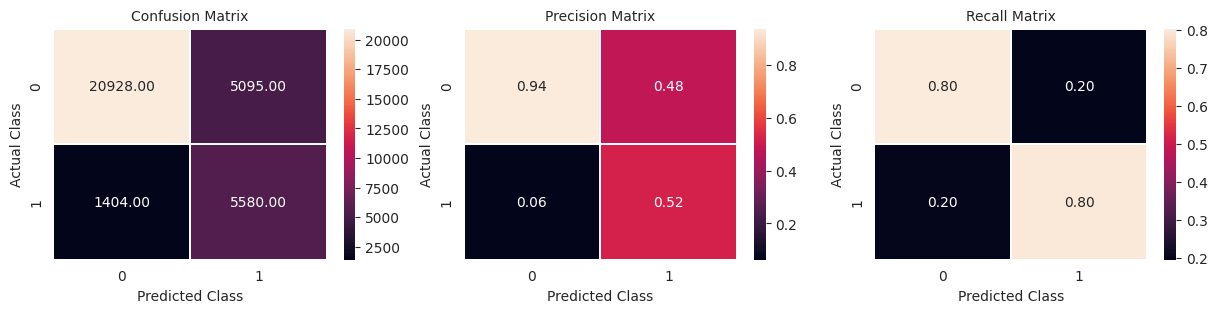


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_0/ already exists
Test AUC Score: 0.887%

Running CV 1

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


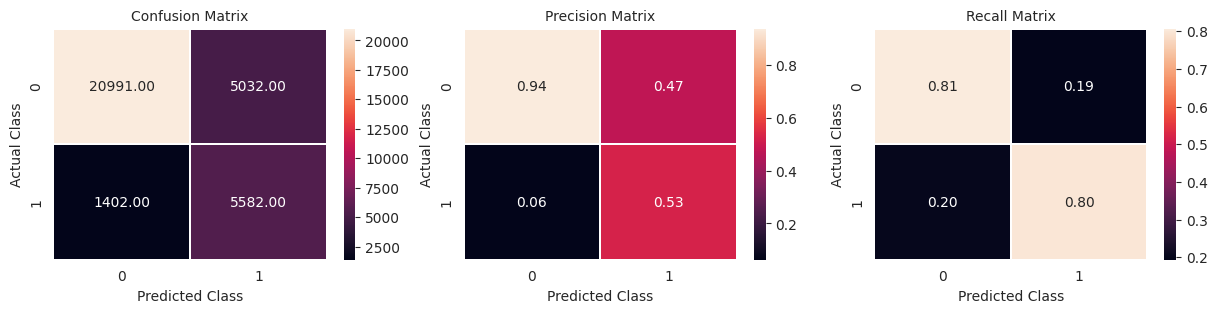


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_1/ already exists
Test AUC Score: 0.887%

Running CV 2

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


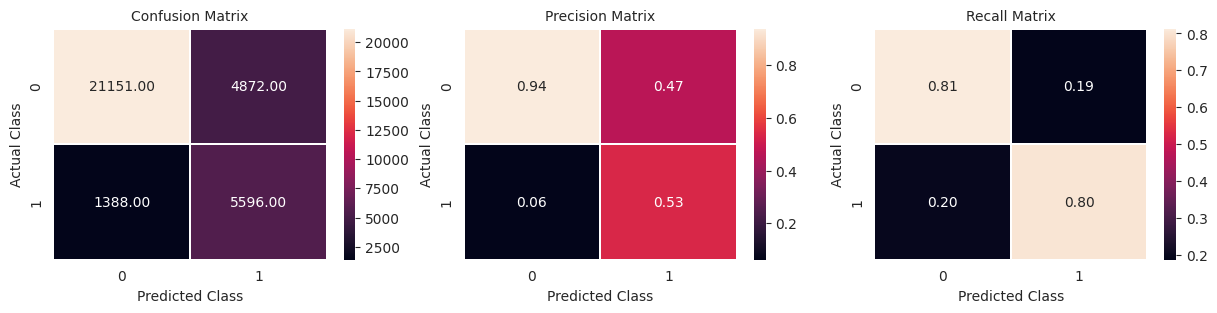


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.76     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/cv_2/ already exists
Test AUC Score: 0.888%

Running CV 3

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


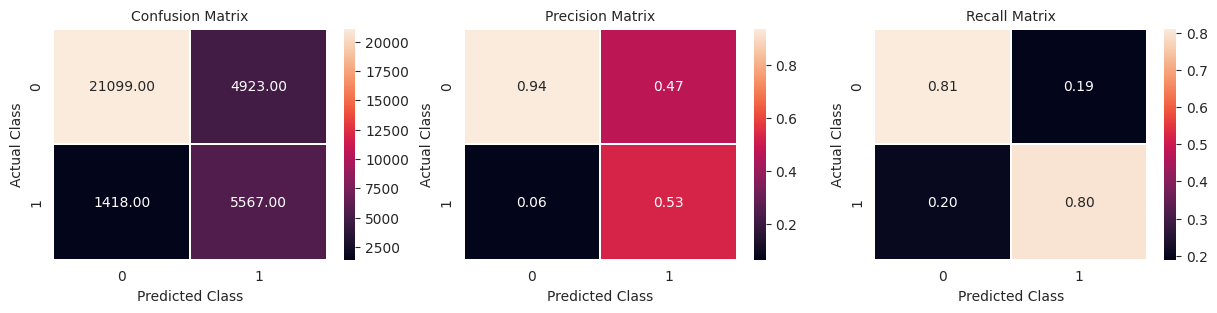


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 4

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


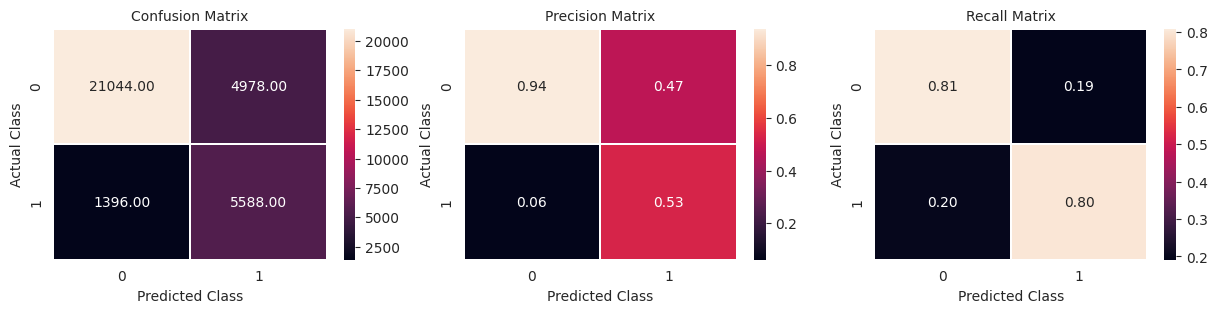


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.885%

Running CV 5

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


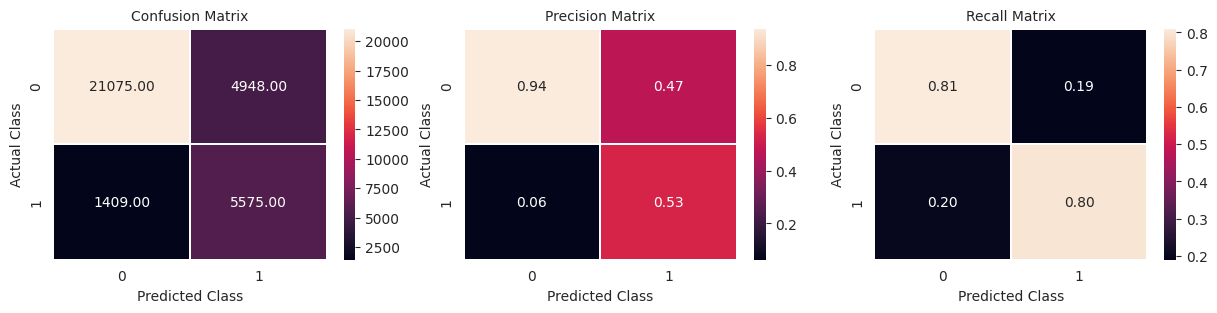


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 6

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


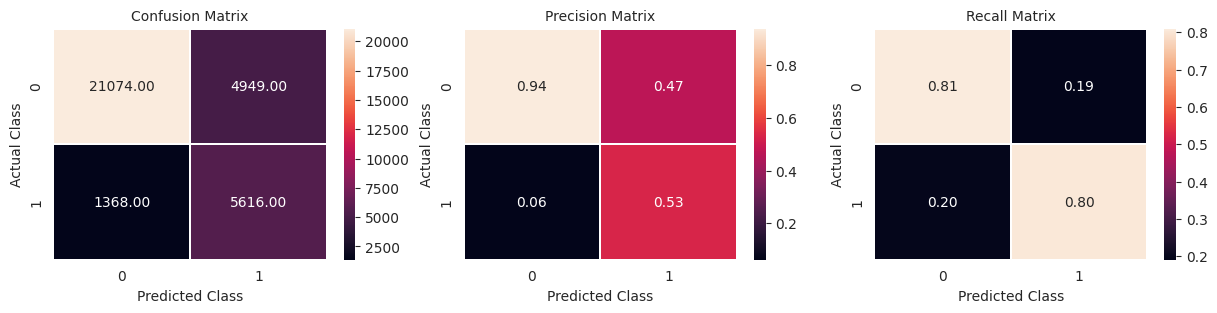


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.89%

Running CV 7

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


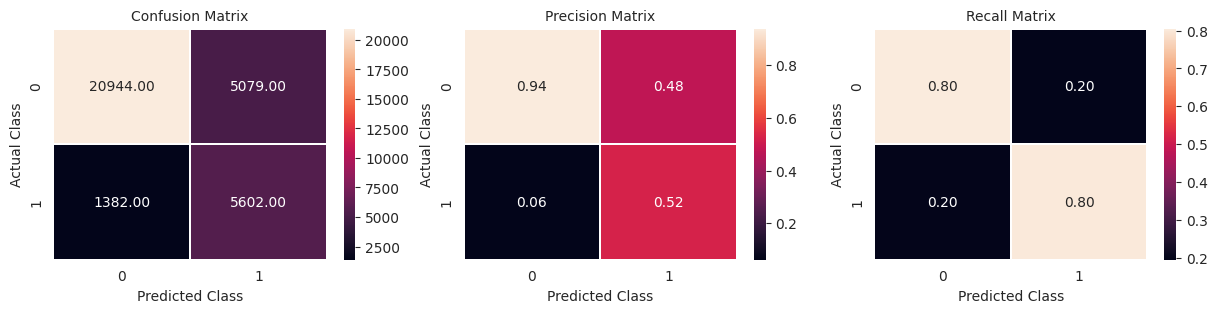


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 8

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


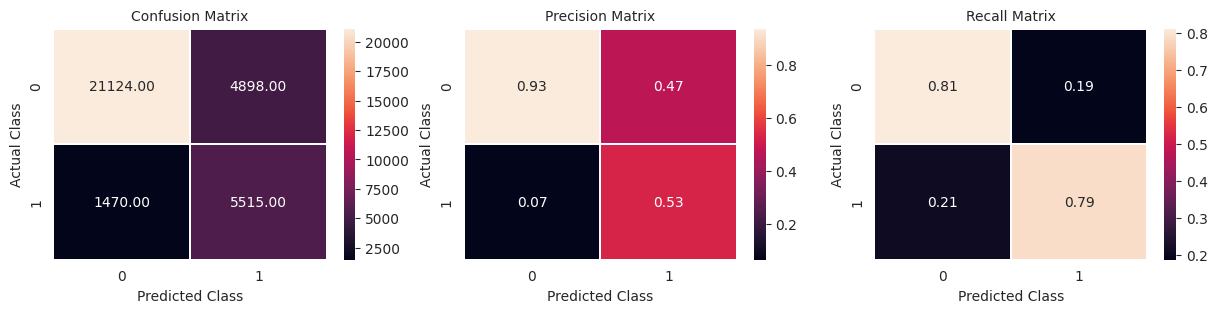


               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     26022
         1.0       0.53      0.79      0.63      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.885%

Running CV 9

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


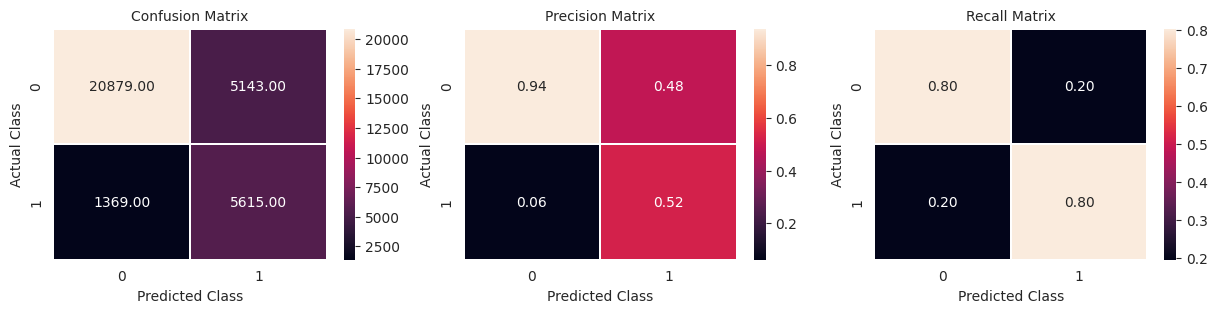


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26022
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.80      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 10

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


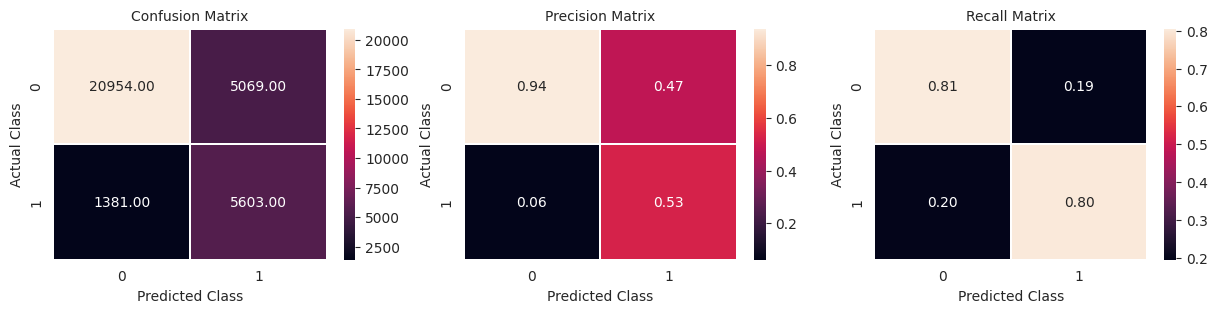


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%

Running CV 11

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


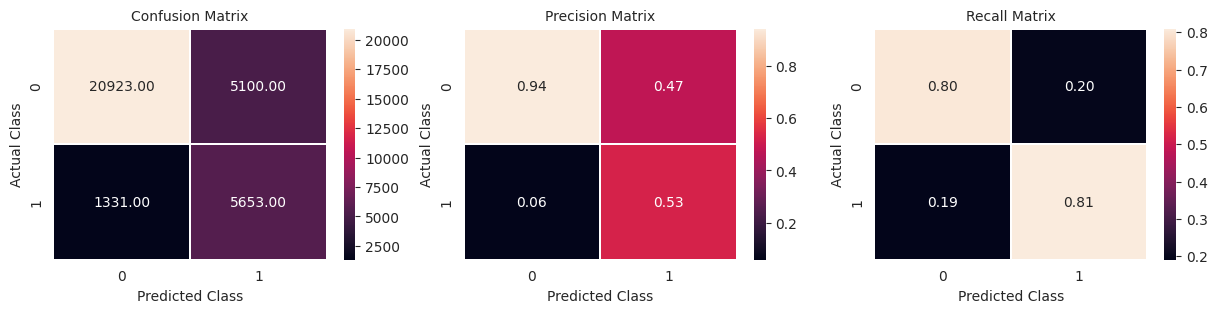


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.53      0.81      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.891%

Running CV 12

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


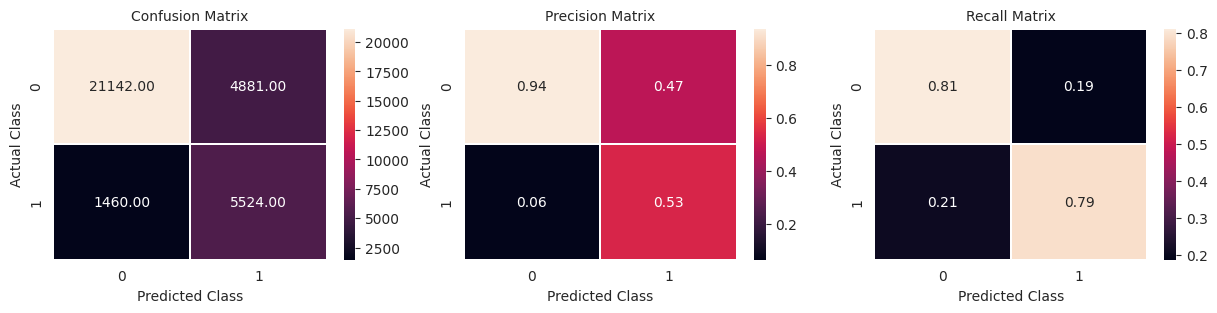


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.79      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%

Running CV 13

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


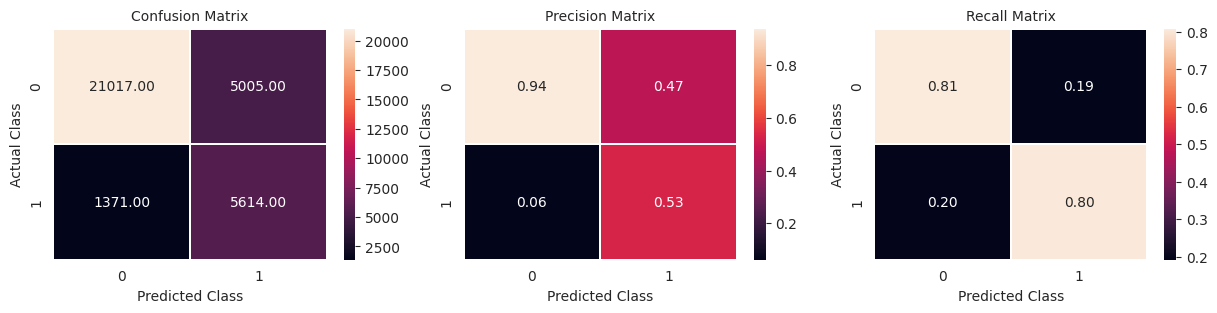


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.888%

Running CV 14

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


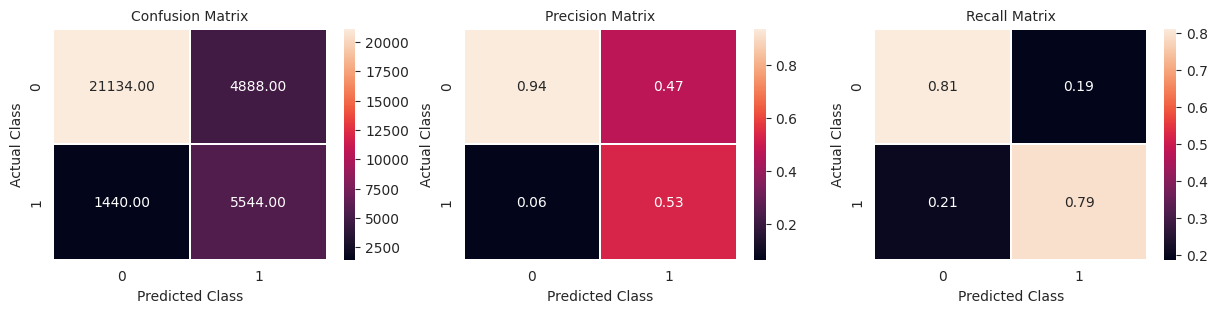


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.79      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 15

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


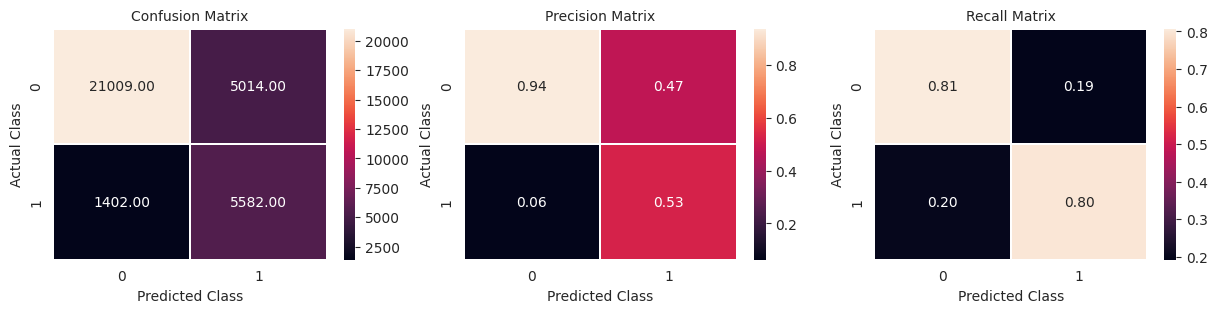


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 16

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


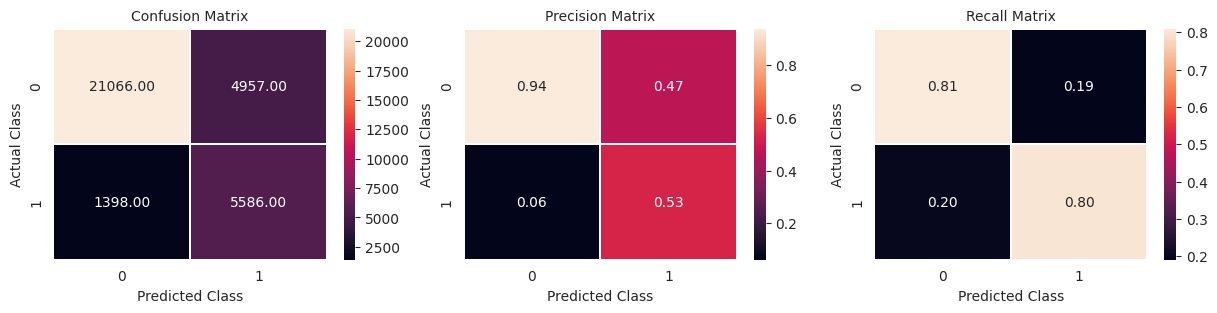


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 17

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


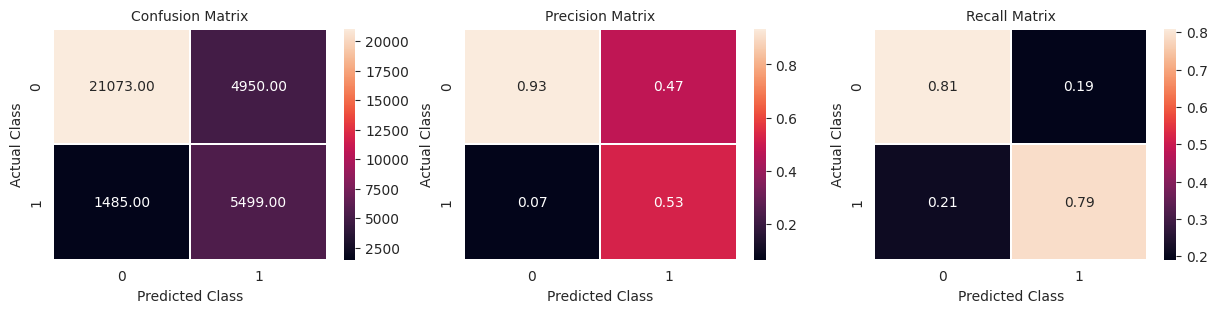


               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     26023
         1.0       0.53      0.79      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.883%

Running CV 18

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


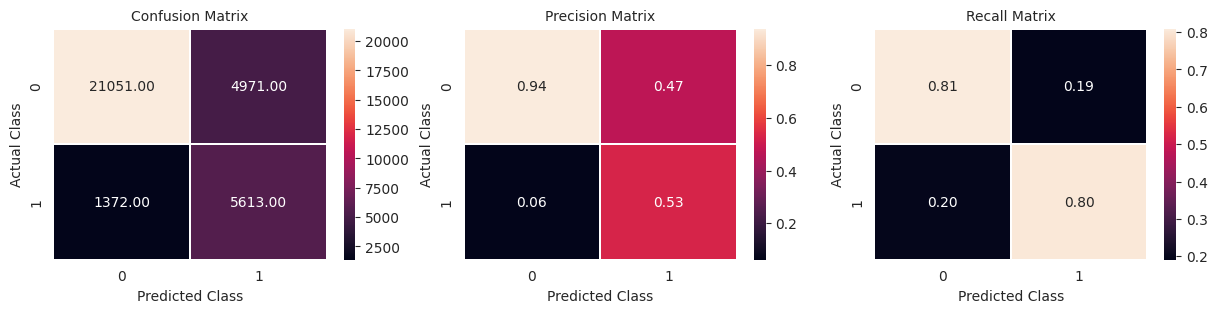


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.89%

Running CV 19

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


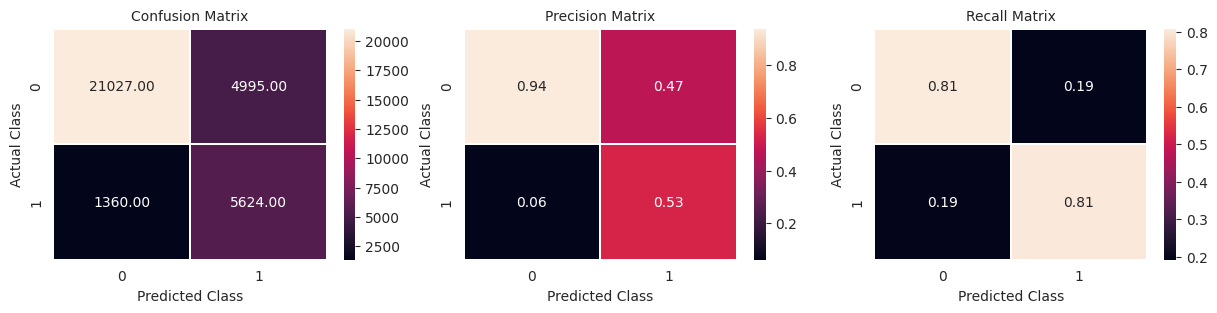


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.81      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.81      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 20

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


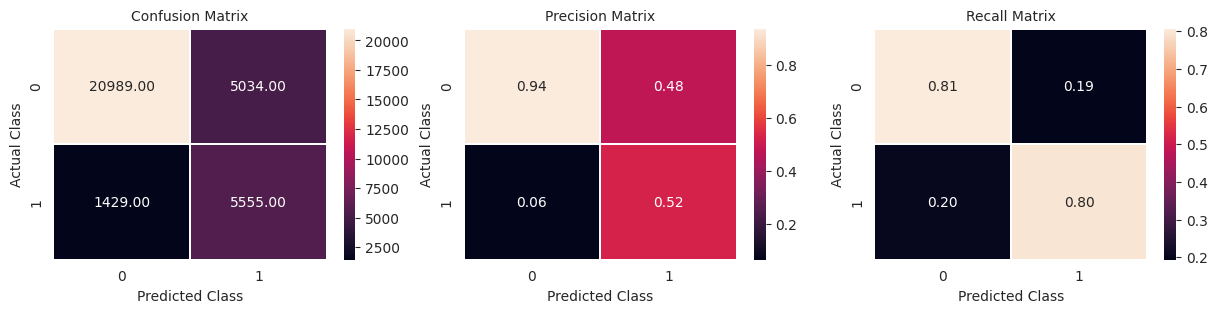


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 21

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


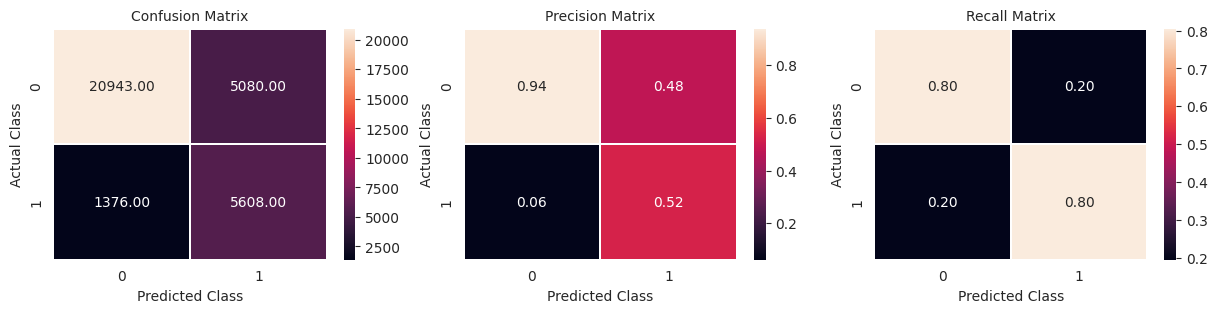


               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     26023
         1.0       0.52      0.80      0.63      6984

    accuracy                           0.80     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.80      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 22

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


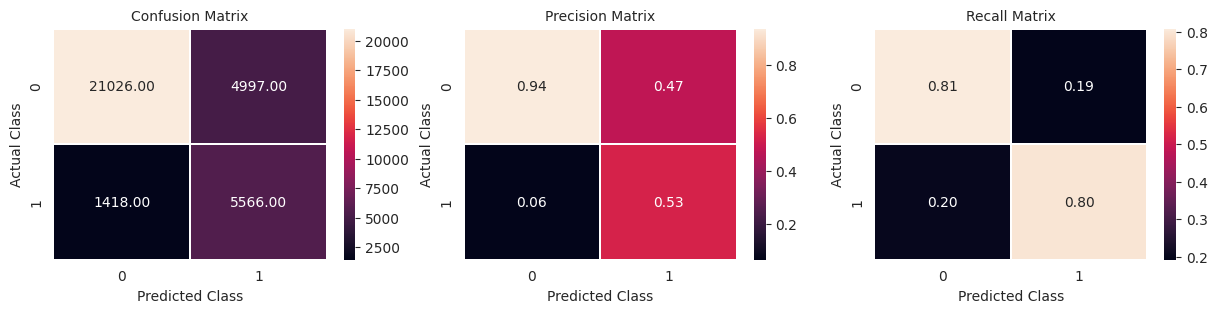


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26023
         1.0       0.53      0.80      0.63      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.887%

Running CV 23

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


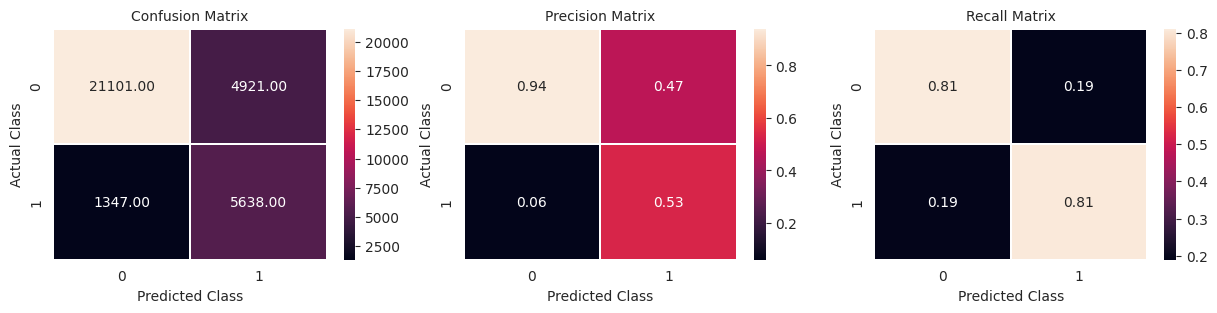


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.81      0.64      6985

    accuracy                           0.81     33007
   macro avg       0.74      0.81      0.76     33007
weighted avg       0.85      0.81      0.82     33007

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.889%

Running CV 24

Start training the model...
Model training finished
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


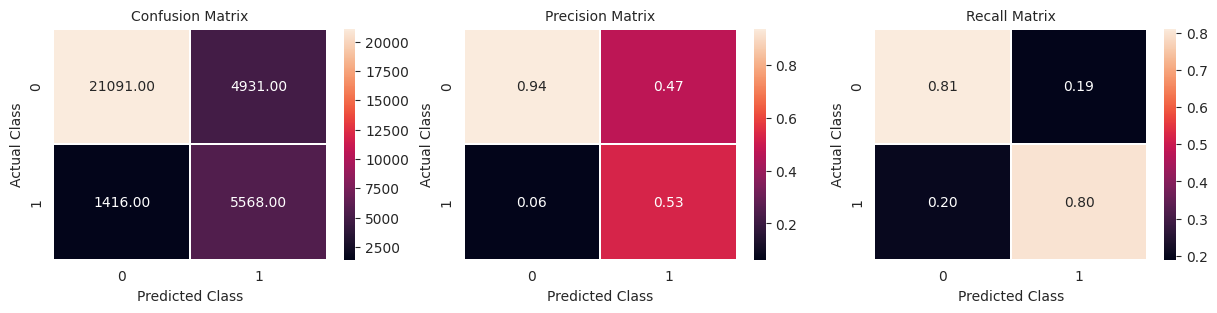


               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     26022
         1.0       0.53      0.80      0.64      6984

    accuracy                           0.81     33006
   macro avg       0.73      0.80      0.75     33006
weighted avg       0.85      0.81      0.82     33006

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/model_LGBM_extended_all_ds_v2/ already exists
Test AUC Score: 0.886%
All Valuation AUC: [0.887, 0.887, 0.888, 0.888, 0.885, 0.887, 0.89, 0.888, 0.885, 0.887, 0.886, 0.891, 0.886, 0.888, 0.887, 0.887, 0.889, 0.883, 0.89, 0.889, 0.887, 0.887, 0.887, 0.889, 0.886]


In [ ]:
test_results_df, oof_results = run_experiment(train,
                                              test,
                                              best_params=best_param,
                                              experiment_name="model_LGBM_extended_all_ds_v2",
                                              splits=5,
                                              n_repeats=5,
                                              rs=42,
                                              calibrate=False)

In [ ]:
np.mean([0.891, 0.892, 0.893, 0.893, 0.89, 0.892, 0.894, 0.893, 0.889, 0.891, 0.891, 0.896, 0.891, 0.892, 0.891, 0.891, 0.892, 0.887, 0.894, 0.894, 0.892, 0.891, 0.892, 0.894, 0.891])
np.mean([0.893, 0.894, 0.894, 0.895, 0.892, 0.893, 0.895, 0.895, 0.89, 0.893, 0.892, 0.897, 0.892, 0.893, 0.892, 0.892, 0.894, 0.889, 0.896, 0.895, 0.893, 0.892, 0.893, 0.895, 0.893])
np.mean([0.893, 0.894, 0.894, 0.895, 0.891, 0.893, 0.895, 0.895, 0.89, 0.892, 0.891, 0.897, 0.892, 0.894, 0.892, 0.892, 0.894, 0.889, 0.896, 0.895, 0.892, 0.891, 0.893, 0.895, 0.893])
np.mean([0.887, 0.887, 0.888, 0.888, 0.885, 0.887, 0.89, 0.888, 0.885, 0.887, 0.886, 0.891, 0.886, 0.888, 0.887, 0.887, 0.889, 0.883, 0.89, 0.889, 0.887, 0.887, 0.887, 0.889, 0.886])

0.88736

#### 3.1.3 Store Results

In [ ]:
experiment_name="model_LGBM_v5_extended_all"

sub = pd.read_csv("sample_submission.csv", index_col=0)
sub.iloc[:,:] = test_results_df.values
sub.to_csv(f"Results/{experiment_name}.csv")
sub

,Exited
id,
165034,0.080981
165035,0.948366
165036,0.104202
165037,0.625639
165038,0.725914
...,...
275052,0.131074
275053,0.318224
275054,0.056549


In [ ]:
sub.loc[duplicate_results_test_df.index,:] = duplicate_results_test_df.values
sub.loc[duplicate_results_test_df.index,:]

sub.to_csv(f"Results/{experiment_name}_with_replacement.csv")

sub.loc[duplicate_results_test_df.index,:]

,Exited
id,
165430,1.0
165722,0.0
165984,1.0
166638,0.0
167218,0.0
...,...
272929,1.0
273022,1.0
273075,1.0


## Ensemble

In [71]:
df_0=pd.read_csv("Results/model_LGBM_v4_extended_with_replacement.csv",index_col=0)
df_1=pd.read_csv("Results/model_LGBM_v3_extended_with_replacement.csv",index_col=0)
df_2=pd.read_csv("Results/model_LGBM_v5_extended_all_with_replacement.csv",index_col=0)
#df_3=pd.read_csv("Results/model_HGBC_v0_enc_with_replacement.csv",index_col=0)

In [79]:
df_final = (df_0+df_1)/2
df_final.to_csv("Results/model_LGBM_final_all_with_replacement.csv")

#df_ens = (df_final+df_3)/2


#df_final.to_csv("Results/model_LGBM_final_all_with_replacement.csv")
#df_ens.to_csv("Results/model_ensemble_LGBM_HGBC_enc_with_replacement.csv")

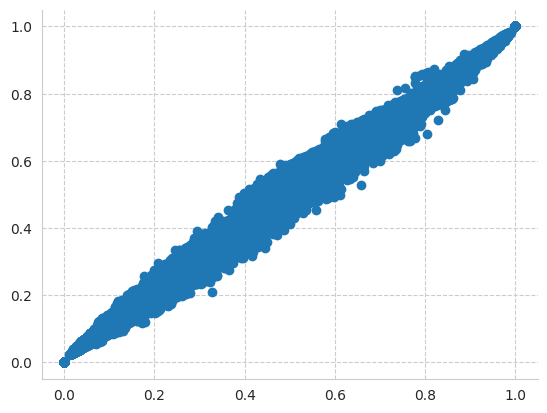

In [77]:
plt.scatter(df_1["Exited"],df_final["Exited"])